1.) What was the change in price of the stock over time?

2.) What was the daily return of the stock on average?

3.) What was the moving average of the various stocks?

4.) What was the correlation between different stocks' closing prices?

5.) What was the correlation between different stocks' daily returns?

6.) How much value do we put at risk by investing in a particular stock?

7.) How can we attempt to predict future stock behavior?

In [2]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [43]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from google
from pandas_datareader import DataReader

# For time stamps
from datetime import datetime

# For division
from __future__ import division

In [52]:
from pandas_datareader import data as pdr


In [190]:
# Analysing  the Stock of Apple, Google, Microsoft and Amazon
tech = ['AAPL','GOOG','MSFT','AMZN']

end = datetime.now()

start = datetime(end.year-1,end.month,end.day)

In [54]:
for stock in tech:
          globals()[stock] = pdr.get_data_yahoo(stock, start, end)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [171]:
GOOG

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-18,133.884003,136.913498,132.932007,136.801498,136.801498,45900000
2022-03-21,136.847504,137.582504,134.611496,136.478500,136.478500,26632000
2022-03-22,136.500000,141.500000,136.500000,140.277496,140.277496,29776000
2022-03-23,139.138504,140.024994,138.166504,138.503494,138.503494,25302000
2022-03-24,139.272507,141.396500,138.039398,141.311996,141.311996,20544000
...,...,...,...,...,...,...
2023-03-13,90.565002,93.080002,89.940002,91.660004,91.660004,31508600
2023-03-14,93.070000,94.830002,92.779999,94.250000,94.250000,32303900
2023-03-15,93.540001,97.250000,93.040001,96.550003,96.550003,38367300


In [61]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-03-18 to 2023-03-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


<AxesSubplot:xlabel='Date'>

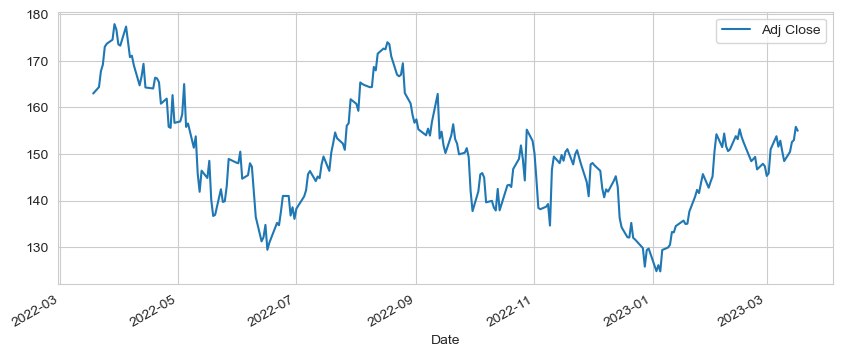

In [62]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

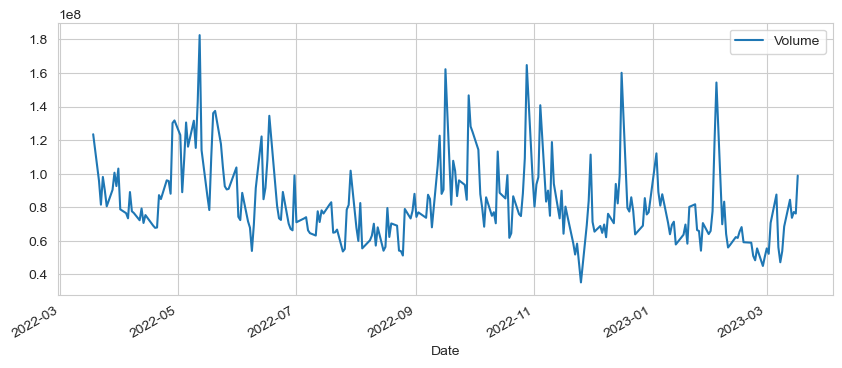

In [63]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [71]:
#MA is for Moving Average

ma_day=[10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name]= AAPL['Adj Close'].rolling(window=ma).mean()

<AxesSubplot:xlabel='Date'>

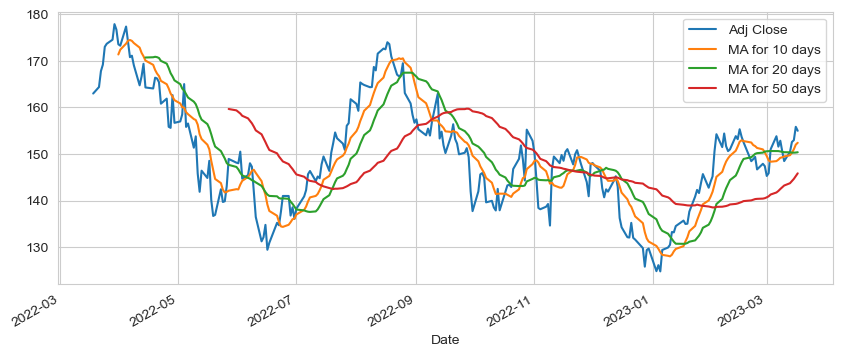

In [70]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

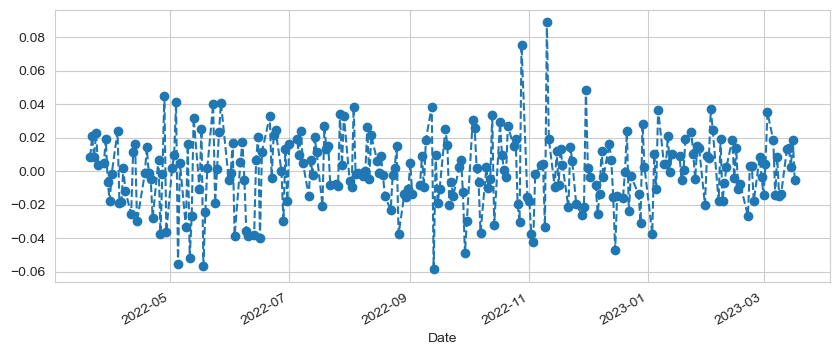

In [76]:
AAPL['Daily Return']= AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4),linestyle='--',marker='o')

#Means on Daily basic what is the %Return on our Money

<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

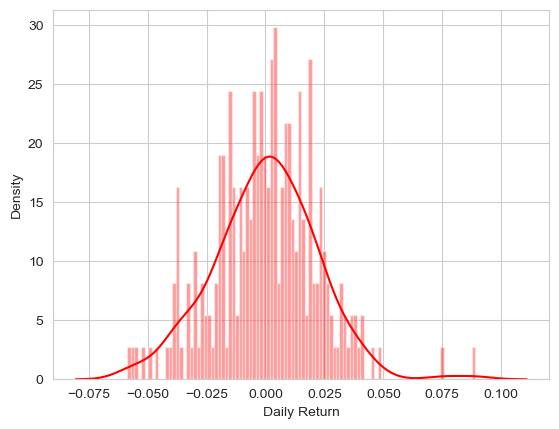

In [78]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='red')

<AxesSubplot:>

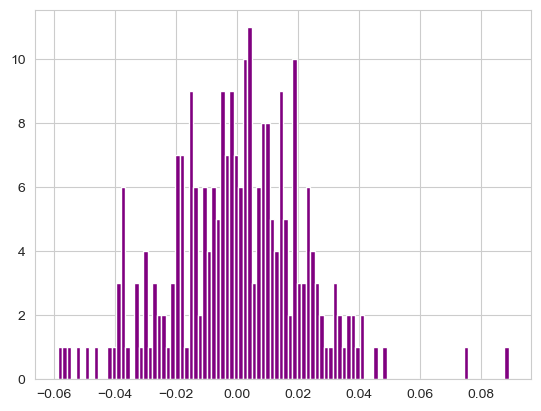

In [80]:
AAPL['Daily Return'].hist(bins=100,color='purple')

In [84]:
df=pdr.get_data_yahoo(tech, start, end)['Adj Close']

[*********************100%***********************]  4 of 4 completed


In [86]:
df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-03-18,162.992630,161.250504,136.801498,297.511322
2022-03-21,164.384216,161.491501,136.478500,296.253662
2022-03-22,167.803497,164.889008,140.277496,301.106049
2022-03-23,169.185120,163.408005,138.503494,296.580414
2022-03-24,173.021896,163.649506,141.311996,301.145691


In [88]:
#rets refers to returns

rets = df.pct_change()

In [91]:
rets.head(10)

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-03-18,NaN,NaN,NaN,NaN
2022-03-21,0.008538,0.001495,-0.002361,-0.004227
2022-03-22,0.020801,0.021038,0.027836,0.016379
2022-03-23,0.008234,-0.008982,-0.012646,-0.015030
2022-03-24,0.022678,0.001478,0.020277,0.015393
2022-03-25,0.003734,0.006868,0.001483,-0.001381
2022-03-28,0.005037,0.025593,0.003028,0.023116
2022-03-29,0.019134,0.001920,0.009158,0.015159
2022-03-30,-0.006650,-0.017801,-0.004227,-0.004914


C:\Users\ritik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


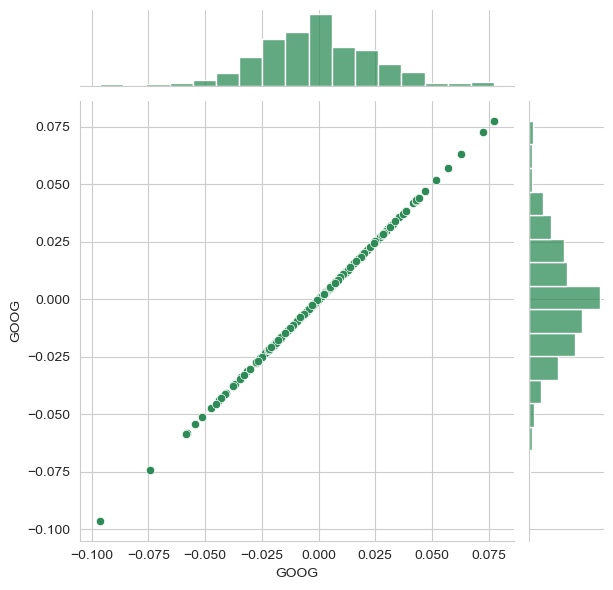

In [94]:
sns.jointplot('GOOG','GOOG',rets,kind='scatter',color='seagreen')

# The Graph will show Positive Linear Relationship

C:\Users\ritik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


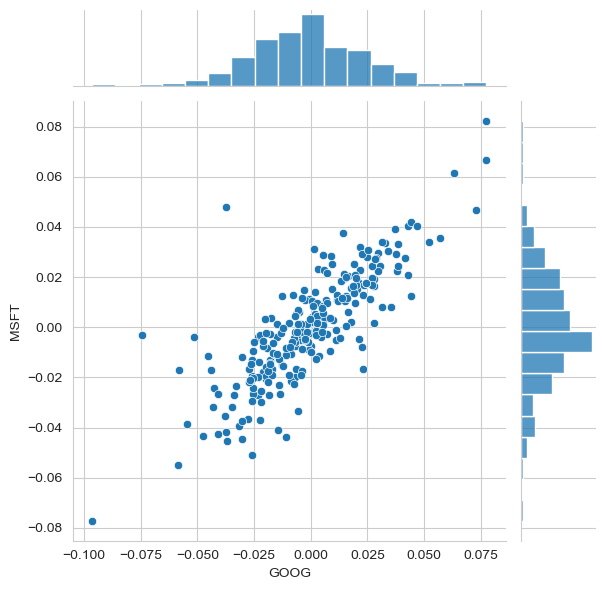

In [98]:
sns.jointplot('GOOG','MSFT',rets,kind='scatter')

In [103]:
rets

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-03-18,NaN,NaN,NaN,NaN
2022-03-21,0.008538,0.001495,-0.002361,-0.004227
2022-03-22,0.020801,0.021038,0.027836,0.016379
2022-03-23,0.008234,-0.008982,-0.012646,-0.015030
2022-03-24,0.022678,0.001478,0.020277,0.015393
...,...,...,...,...
2023-03-13,0.013266,0.018737,0.007142,0.021441
2023-03-14,0.014089,0.026507,0.028257,0.027056
2023-03-15,0.002621,0.013912,0.024403,0.017830


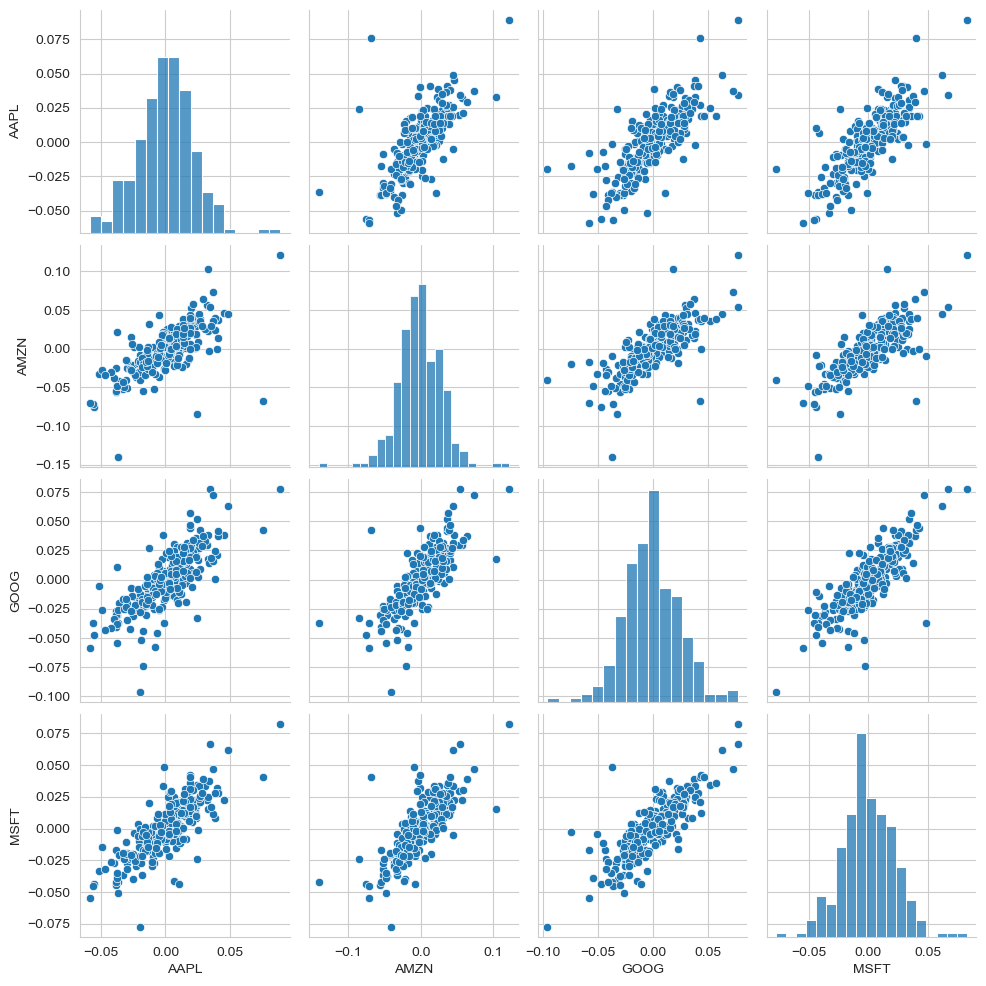

In [104]:
sns.pairplot(rets.dropna())

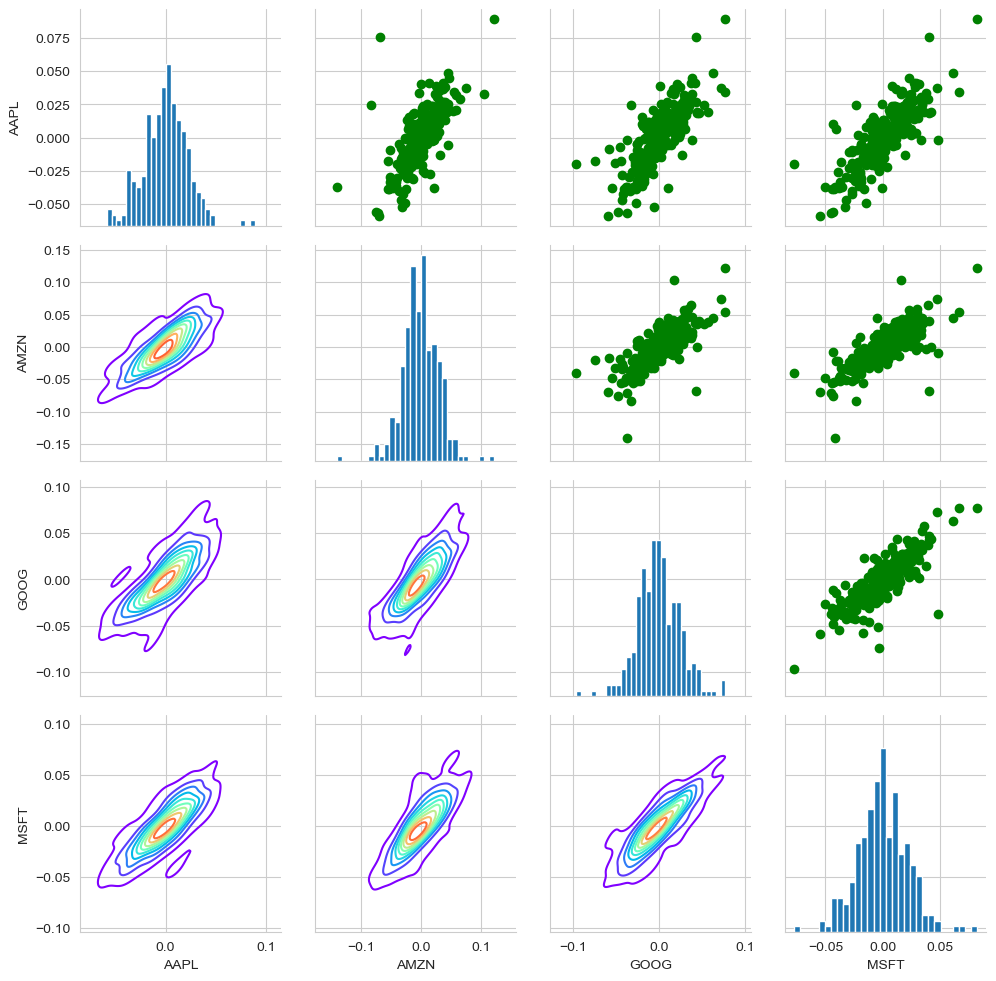

In [111]:
returns= sns.PairGrid(rets.dropna())

returns.map_upper(plt.scatter,color='green')

returns.map_lower(sns.kdeplot,cmap= 'rainbow')

returns.map_diag(plt.hist,bins=30)


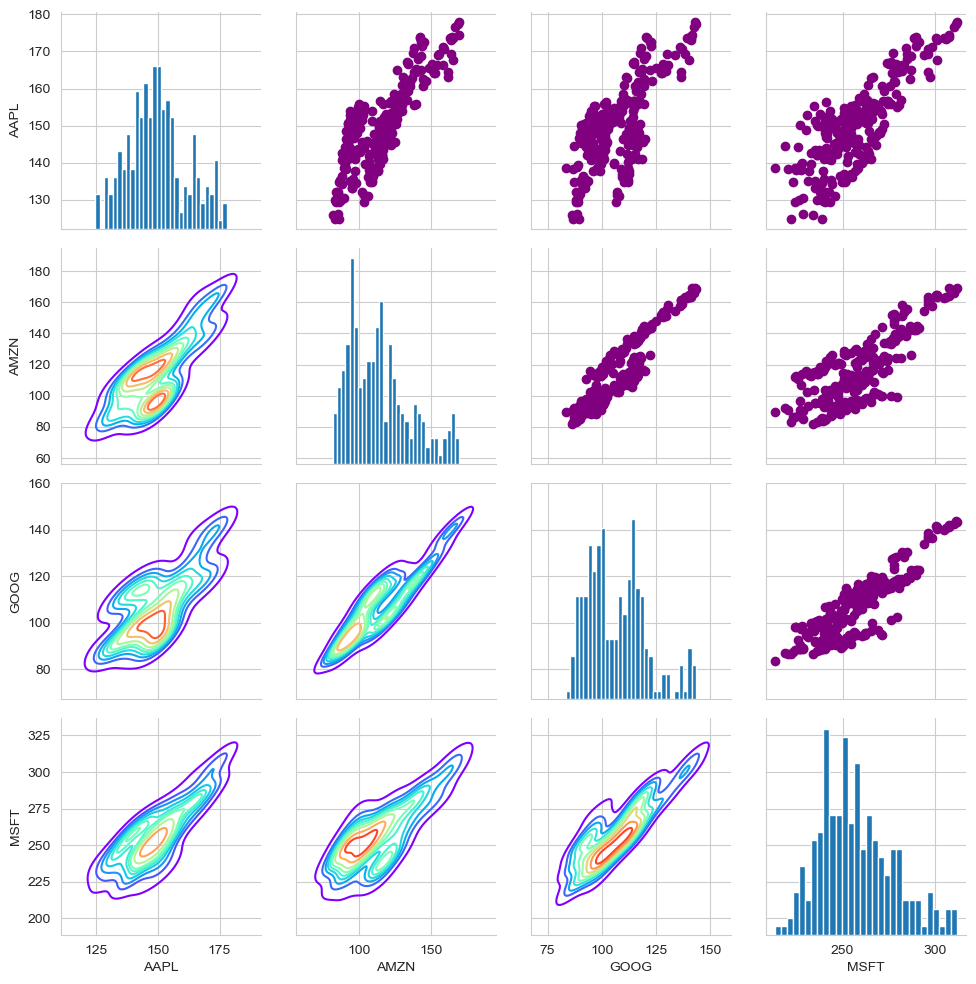

In [114]:
returns= sns.PairGrid(df.dropna())

returns.map_upper(plt.scatter,color='purple')

returns.map_lower(sns.kdeplot,cmap= 'rainbow')

returns.map_diag(plt.hist,bins=30)


<AxesSubplot:>

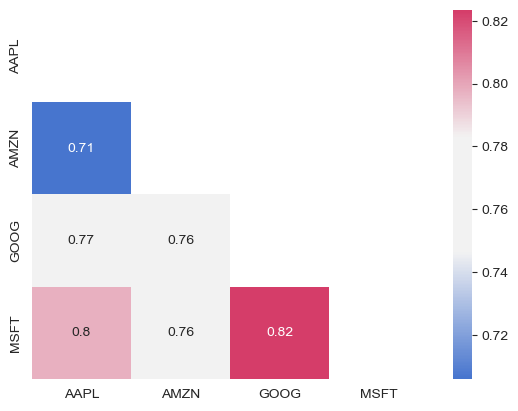

In [121]:
corr=rets.dropna().corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True

sns.heatmap(corr, cmap=sns.diverging_palette(256,0,sep=80,n=7, as_cmap=True),annot=True,mask=mask)

<AxesSubplot:>

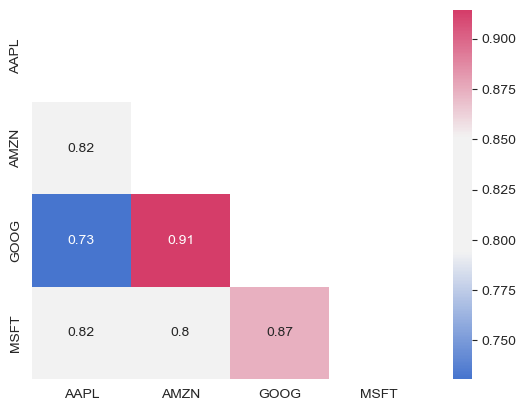

In [125]:
# This is for Closing returns data
corr=df.dropna().corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True

sns.heatmap(corr, cmap=sns.diverging_palette(256,0,sep=80,n=7, as_cmap=True),annot=True,mask=mask)

In [126]:
#Risk analysis

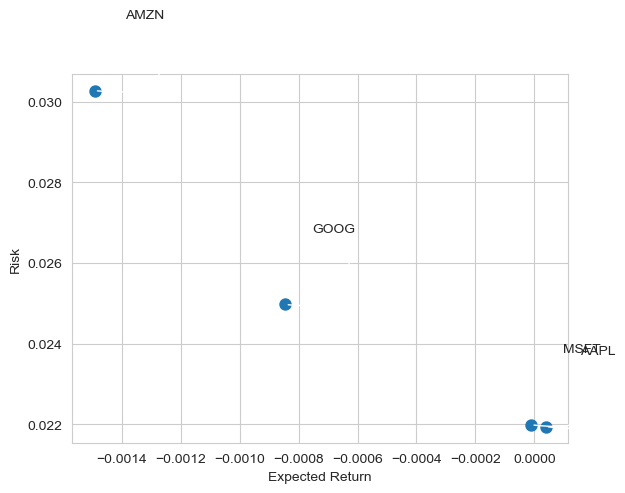

In [172]:
techs = rets.dropna()

area= np.pi*20
plt.scatter(tech.mean(),tech.std(),s=area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(tech.columns, tech.mean(), tech.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-1'))

C:\Users\ritik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

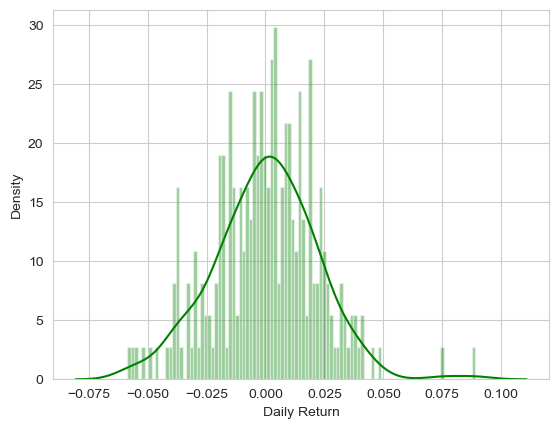

In [173]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='Green')

In [174]:
tech

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-03-21,0.008538,0.001495,-0.002361,-0.004227
2022-03-22,0.020801,0.021038,0.027836,0.016379
2022-03-23,0.008234,-0.008982,-0.012646,-0.015030
2022-03-24,0.022678,0.001478,0.020277,0.015393
2022-03-25,0.003734,0.006868,0.001483,-0.001381
...,...,...,...,...
2023-03-13,0.013266,0.018737,0.007142,0.021441
2023-03-14,0.014089,0.026507,0.028257,0.027056
2023-03-15,0.002621,0.013912,0.024403,0.017830


In [175]:
# This helps in Getting Value at risk % means in one de we will loose 0.037% for Apple beacause we it is in negative
techs['AAPL'].quantile(0.05)

-0.037370278099558195

In [178]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now we will grab our mu (drift) from the expected return data we got for AAPL
mu = techs.mean()['GOOG']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = techs.std()['GOOG']

In [163]:
def stock(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [166]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2022-03-18,160.509995,164.479996,159.759995,163.979996,162.992645,123511700,NaN,NaN,NaN,NaN
2022-03-21,163.509995,166.350006,163.009995,165.380005,164.384201,95811400,NaN,NaN,NaN,0.008538
2022-03-22,165.509995,169.419998,164.910004,168.820007,167.803513,81532000,NaN,NaN,NaN,0.020801
2022-03-23,167.990005,172.639999,167.649994,170.210007,169.185120,98062700,NaN,NaN,NaN,0.008233
2022-03-24,171.059998,174.139999,170.210007,174.070007,173.021881,90131400,NaN,NaN,NaN,0.022678


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

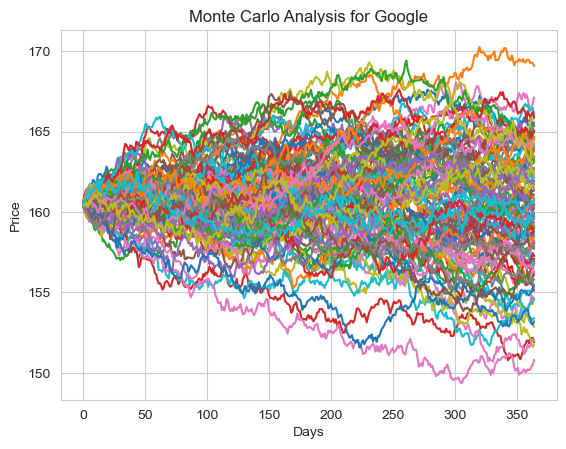

In [182]:
#Monte Carlo is used to run many trials with random market conditions. 
#It is used to know how risky the stock is

start_price=160.509995
for run in range(100):
    plt.plot(stock(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [185]:
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Google Stock after 365 days')

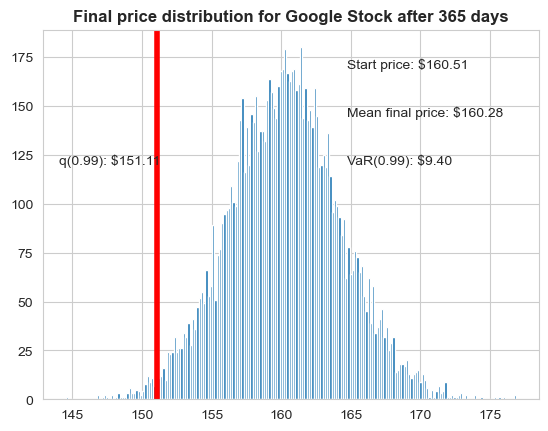

In [189]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold')